In [1]:
import numpy as np
import pandas as pd
import _pickle as cPickle
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df['species']=iris.target

In [5]:
df_binary=df[df['species']!=2]
df_binary=df_binary.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)

In [6]:
df_binary

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [7]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values

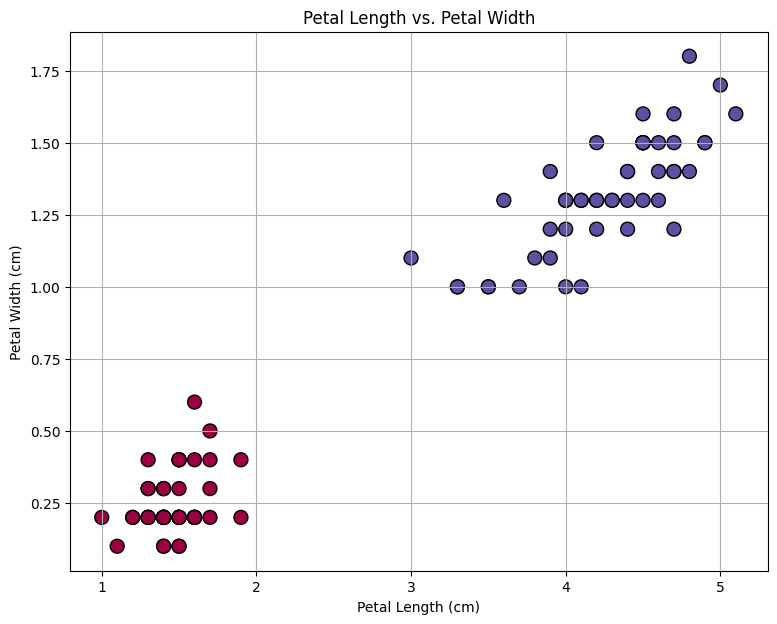

In [8]:
import matplotlib.pyplot as plt

# Plotting petal length vs. petal width
plt.figure(figsize=(9, 7))
plt.scatter(df_binary['petal length (cm)'], df_binary['petal width (cm)'], c=y, cmap='Spectral', s=100, edgecolor='k')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid()
plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [10]:
max = [0,0]
for i in range(5):
    
    classificador=MLP(hidden_layer_sizes=(22,), max_iter=10000, activation="tanh", 
                          learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=i), 
    scoring = {"accuracy": make_scorer(accuracy_score)} , return_estimator = True)
    
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        bb = classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Melhor resultado: 
 Acurácia: 1.0
 Seed: 0


In [11]:
bb.fit(X, y)
Predições=bb.predict(X)
print("Predictions:", Predições)
print("Labels:", y)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


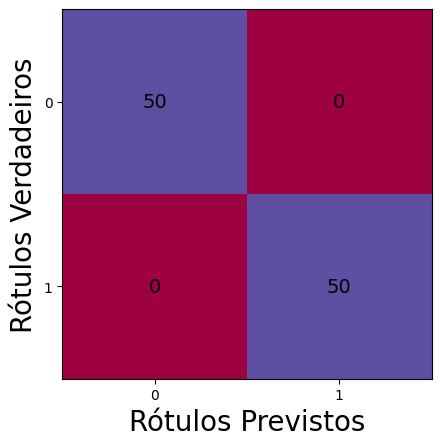

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y)
Predição = cross_val_predict(bb, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=0))
conf_matrix = confusion_matrix(y, Predição, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

In [13]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values
bb.fit(X, y)
Predições=bb.predict(X)

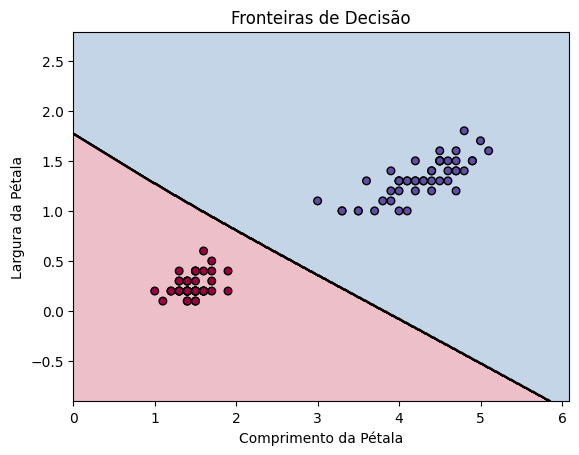

In [14]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

## Algoritmo Genético

In [15]:
import deap
from deap import base, creator, tools, algorithms
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms

In [16]:
# Função para criar um indivíduo a partir dos dados
def create_individual():
    # Escolher um indivíduo inicial aleatoriamente
    idx = random.randint(0, len(individuos_iniciais) - 1)
    return individuos_iniciais[idx] + [classes_iniciais[idx]]  # Combina características com classe

# Função de distância (temporária)
def distance_function(x0d, x1d, discrete, continuous, class_name):
    # Função de exemplo para calcular distância
    return np.linalg.norm(np.array(list(x0d.values())) - np.array(list(x1d.values())))

In [17]:
# Converter as linhas do DataFrame (excluindo a classe) em listas de características
individuos_iniciais = df[['petal length (cm)', 'petal width (cm)']].values.tolist()
classes_iniciais = df['species'].tolist()

# Criar a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

In [18]:
# Função de fitness 
def fitness_sso(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # similar_same_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    # zero if is too similar
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio
    
    y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
    y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
    target_similarity = 1.0 if y0 == y1 else 0.0
    
    evaluation = float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)
    return evaluation,
   
def fitness_sdo(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1):
    # similar_different_outcome
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}

    # zero if is too similar
    sim_ratio = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name)
    record_similarity = 0.0 if sim_ratio >= eta else sim_ratio

    y0 = bb.predict(np.asarray(x0).reshape(1, -1))[0]
    y1 = bb.predict(np.asarray(x1).reshape(1, -1))[0]
    target_similarity = 1.0 if y0 != y1 else 0.0  

    evaluation = alpha1 * record_similarity + alpha2 * target_similarity
    return evaluation,

In [19]:
#Reprodução
def cxBlendWithClass(ind1, ind2, alpha=0.5):
   
    for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
        gamma = (1. + 2. * alpha) * random.random() - alpha
        ind1[i] = (1. - gamma) * x1 + gamma * x2
        ind2[i] = gamma * x1 + (1. - gamma) * x2
    
    # Manter a classe original dos indivíduos sem alterar
    ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
    ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
    
    return ind1, ind2

#Mutação
def mutGaussianWithClass(individual, mu, sigma, indpb):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
    
    return individual,  # Retorne um único indivíduo como tupla

In [20]:
#Criando indivíduos que estão próximos e resultam numa mesma classe

def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.7
    alpha2 = 0.7
    eta = 0.1
    discrete = ['feature1']
    continuous = ['feature2']
    class_name = 'class'
    idx_features = ['feature1', 'feature2']
    
    x1 = individuos_iniciais[1]  # Exemplo de indivíduo inicial

    # Avaliar usando a função de fitness fornecida
    return fitness_sso(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Criar a população inicial
population = toolbox.population(n=100)
for i, ind in enumerate(population):
    print(f"Indivíduo {i+1}: {ind}")
# Parâmetros do algoritmo
ngen = 30  # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_semelhantes = [ind[:3] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_semelhantes}")

Indivíduo 1: [3.3, 1.0, 1]
Indivíduo 2: [4.6, 1.4, 1]
Indivíduo 3: [1.6, 0.4, 0]
Indivíduo 4: [1.6, 0.6, 0]
Indivíduo 5: [5.1, 1.8, 2]
Indivíduo 6: [4.5, 1.5, 1]
Indivíduo 7: [5.1, 1.6, 1]
Indivíduo 8: [5.1, 1.9, 2]
Indivíduo 9: [1.4, 0.2, 0]
Indivíduo 10: [1.5, 0.2, 0]
Indivíduo 11: [4.6, 1.4, 1]
Indivíduo 12: [4.5, 1.5, 1]
Indivíduo 13: [4.4, 1.4, 1]
Indivíduo 14: [1.4, 0.2, 0]
Indivíduo 15: [5.6, 2.2, 2]
Indivíduo 16: [1.6, 0.2, 0]
Indivíduo 17: [1.5, 0.2, 0]
Indivíduo 18: [4.5, 1.5, 1]
Indivíduo 19: [4.4, 1.4, 1]
Indivíduo 20: [4.2, 1.3, 1]
Indivíduo 21: [1.3, 0.2, 0]
Indivíduo 22: [4.9, 1.8, 2]
Indivíduo 23: [6.1, 2.5, 2]
Indivíduo 24: [3.9, 1.4, 1]
Indivíduo 25: [5.0, 1.7, 1]
Indivíduo 26: [4.8, 1.8, 2]
Indivíduo 27: [5.7, 2.1, 2]
Indivíduo 28: [1.7, 0.3, 0]
Indivíduo 29: [6.1, 2.5, 2]
Indivíduo 30: [5.5, 2.1, 2]
Indivíduo 31: [1.4, 0.2, 0]
Indivíduo 32: [3.9, 1.1, 1]
Indivíduo 33: [1.5, 0.4, 0]
Indivíduo 34: [5.6, 2.2, 2]
Indivíduo 35: [4.4, 1.2, 1]
Indivíduo 36: [1.5, 0.1, 0]
I

In [21]:
#Criando indivíduos que estão próximos mas resultam em um classe diferente

def evaluate(individual):
    # Parâmetros da função de fitness (exemplo)
    alpha1 = 0.7
    alpha2 = 0.7
    eta = 0.1
    discrete = ['feature1']
    continuous = ['feature2']
    class_name = 'class'
    idx_features = ['feature1', 'feature2']
    
    x1 = individuos_iniciais[1]  # Exemplo de indivíduo inicial

    # Avaliar usando a função de fitness fornecida
    return fitness_sdo(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, x1)

# Configuração da toolbox
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Criar a população inicial
population = toolbox.population(n=100)
for i, ind in enumerate(population):
    print(f"Indivíduo {i+1}: {ind}")
# Parâmetros do algoritmo
ngen = 30  # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_diferentes= [ind[:3] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_diferentes}")

Indivíduo 1: [5.0, 1.5, 2]
Indivíduo 2: [4.9, 1.8, 2]
Indivíduo 3: [1.5, 0.1, 0]
Indivíduo 4: [5.2, 2.3, 2]
Indivíduo 5: [1.3, 0.4, 0]
Indivíduo 6: [4.1, 1.3, 1]
Indivíduo 7: [4.6, 1.5, 1]
Indivíduo 8: [5.9, 2.1, 2]
Indivíduo 9: [4.0, 1.3, 1]
Indivíduo 10: [1.6, 0.2, 0]
Indivíduo 11: [1.3, 0.2, 0]
Indivíduo 12: [1.4, 0.1, 0]
Indivíduo 13: [5.1, 2.4, 2]
Indivíduo 14: [1.4, 0.3, 0]
Indivíduo 15: [4.7, 1.6, 1]
Indivíduo 16: [1.5, 0.4, 0]
Indivíduo 17: [4.5, 1.5, 1]
Indivíduo 18: [6.0, 2.5, 2]
Indivíduo 19: [1.9, 0.4, 0]
Indivíduo 20: [5.1, 1.8, 2]
Indivíduo 21: [5.5, 1.8, 2]
Indivíduo 22: [3.9, 1.2, 1]
Indivíduo 23: [5.2, 2.3, 2]
Indivíduo 24: [4.9, 1.5, 1]
Indivíduo 25: [4.5, 1.5, 1]
Indivíduo 26: [4.4, 1.2, 1]
Indivíduo 27: [1.5, 0.4, 0]
Indivíduo 28: [1.5, 0.1, 0]
Indivíduo 29: [1.2, 0.2, 0]
Indivíduo 30: [4.0, 1.3, 1]
Indivíduo 31: [1.4, 0.2, 0]
Indivíduo 32: [4.5, 1.3, 1]
Indivíduo 33: [1.9, 0.2, 0]
Indivíduo 34: [4.0, 1.2, 1]
Indivíduo 35: [4.5, 1.5, 1]
Indivíduo 36: [4.8, 1.8, 2]
I

In [22]:
SSO=pd.DataFrame(novos_individuos_semelhantes)
SDO=pd.DataFrame(novos_individuos_diferentes)
print(SSO.head())
print(SDO.head())

          0         1  2
0  1.533389 -0.692870  0
1  1.499345 -0.692085  0
2  1.523015 -0.690066  0
3  1.532228 -0.691865  0
4  1.530944 -1.090367  0
          0         1  2
0  2.104754  0.759824  1
1  2.104754  1.655888  1
2  2.104756  0.759822  1
3  2.104754  0.759824  1
4  2.104753  0.759822  1


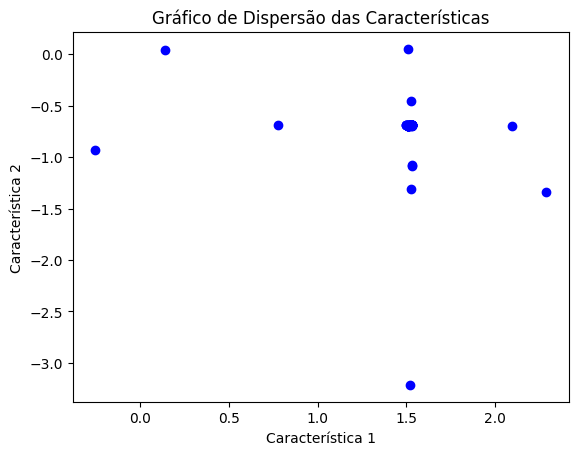

In [23]:
import matplotlib.pyplot as plt

plt.scatter(SSO[0], SSO[1], c='b')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

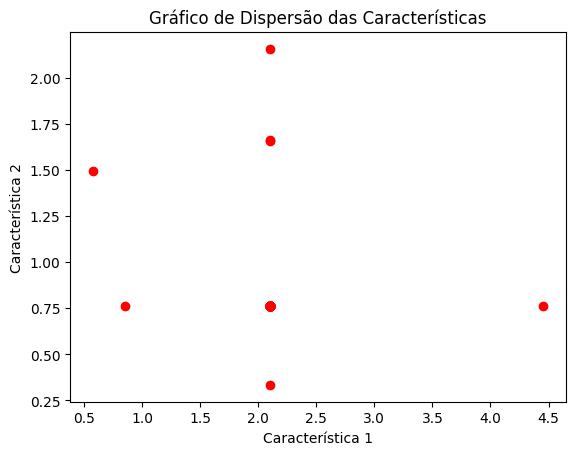

In [24]:
import matplotlib.pyplot as plt

plt.scatter(SDO[0], SDO[1], c='r')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

In [25]:
XSSO=SSO.iloc[:,[0,1]].values
#ySSO=SSO.iloc[:,-1].values
XSDO=SDO.iloc[:,[0,1]].values
#ySDO=SDO.iloc[:,-1].values

In [26]:
XTOTAL = np.vstack((XSSO, XSDO))
#yTOTAL = np.concatenate((ySSO, ySDO))
x1 = individuos_iniciais[1]

In [27]:
XTOTAL = np.vstack((XSSO, XSDO))
ytotal= bb.predict(XTOTAL)
#print(XTOTAL)
#print(ytotal)

In [28]:
from sklearn.tree import DecisionTreeClassifier
ClassificadorDT = DecisionTreeClassifier(max_depth=15, random_state=42)
ClassificadorDT.fit(XTOTAL, ytotal)

DecisionTreeClassifier(max_depth=15, random_state=42)

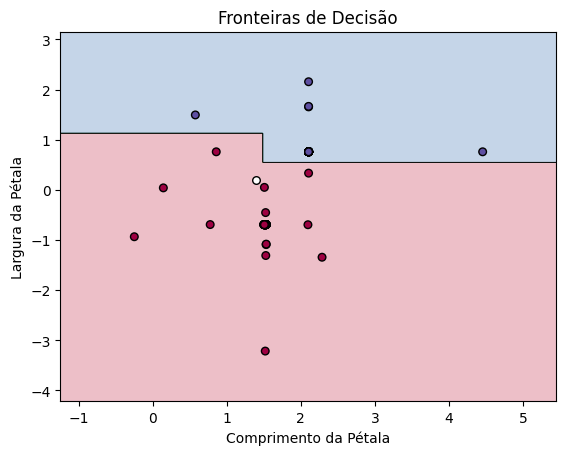

In [29]:
x_min, x_max = XTOTAL[:, 0].min() - 1, XTOTAL[:, 0].max() + 1
y_min, y_max = XTOTAL[:, 1].min() - 1, XTOTAL[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid') 
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(x1[0], x1[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

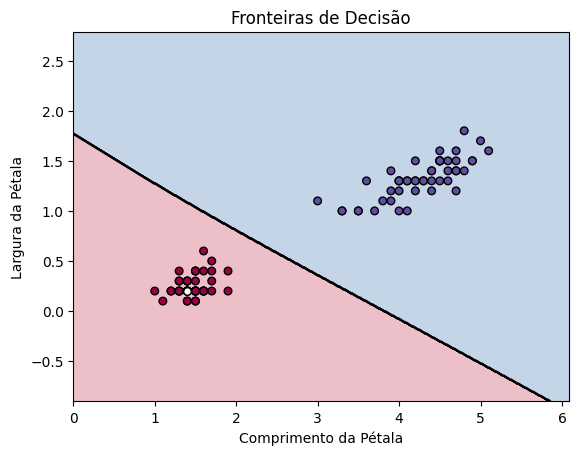

In [30]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(x1[0], x1[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

In [31]:
print (x1)

[1.4, 0.2]


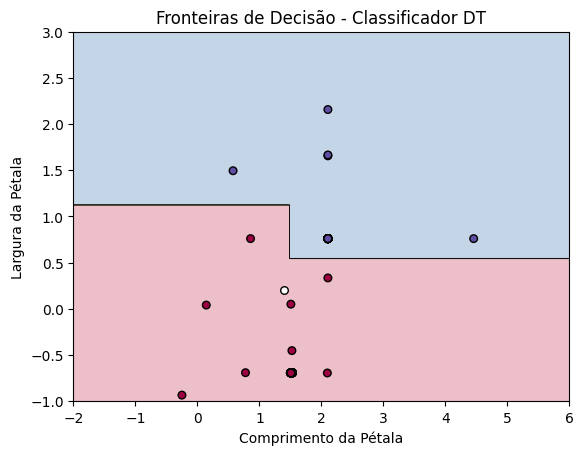

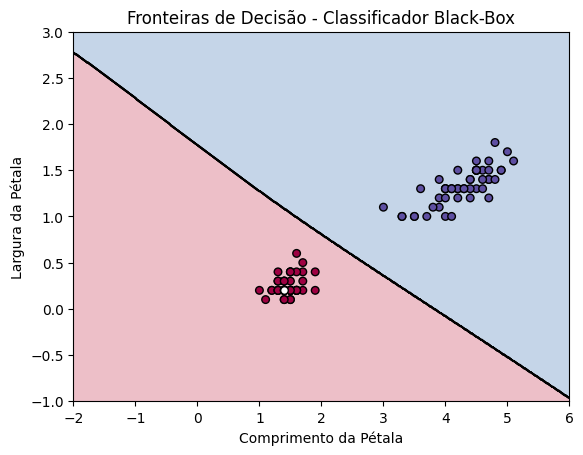

In [32]:
# Definir os limites manualmente
x_min = -2  # Substitua pelo limite desejado para o eixo X
x_max = 6   # Substitua pelo limite desejado para o eixo X
y_min = -1  # Substitua pelo limite desejado para o eixo Y
y_max = 3   # Substitua pelo limite desejado para o eixo Y

# Criar a grade de pontos com os valores fixos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Gráfico 1
Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid')
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(x1[0], x1[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador DT')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Gráfico 2
Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(x1[0], x1[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador Black-Box')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()